# **Amazon Delivery Time Prediction**



## **1. Know Your Data**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Dataset Loading

In [4]:
# Load Dataset
# Amazon Delivery Time (ADT)
adt_data = pd.read_csv("C:/Users/srush/Desktop/00_Labmentix/08_Amazon Delivery Time Prediction/Dataset/amazon_delivery.csv")

### Dataset First View

In [6]:
# Dataset First Look
adt_data.head(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [7]:
adt_data.shape

(43739, 16)

### Dataset Information

In [8]:
adt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Duplicate Values

In [9]:
adt_data.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
adt_data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

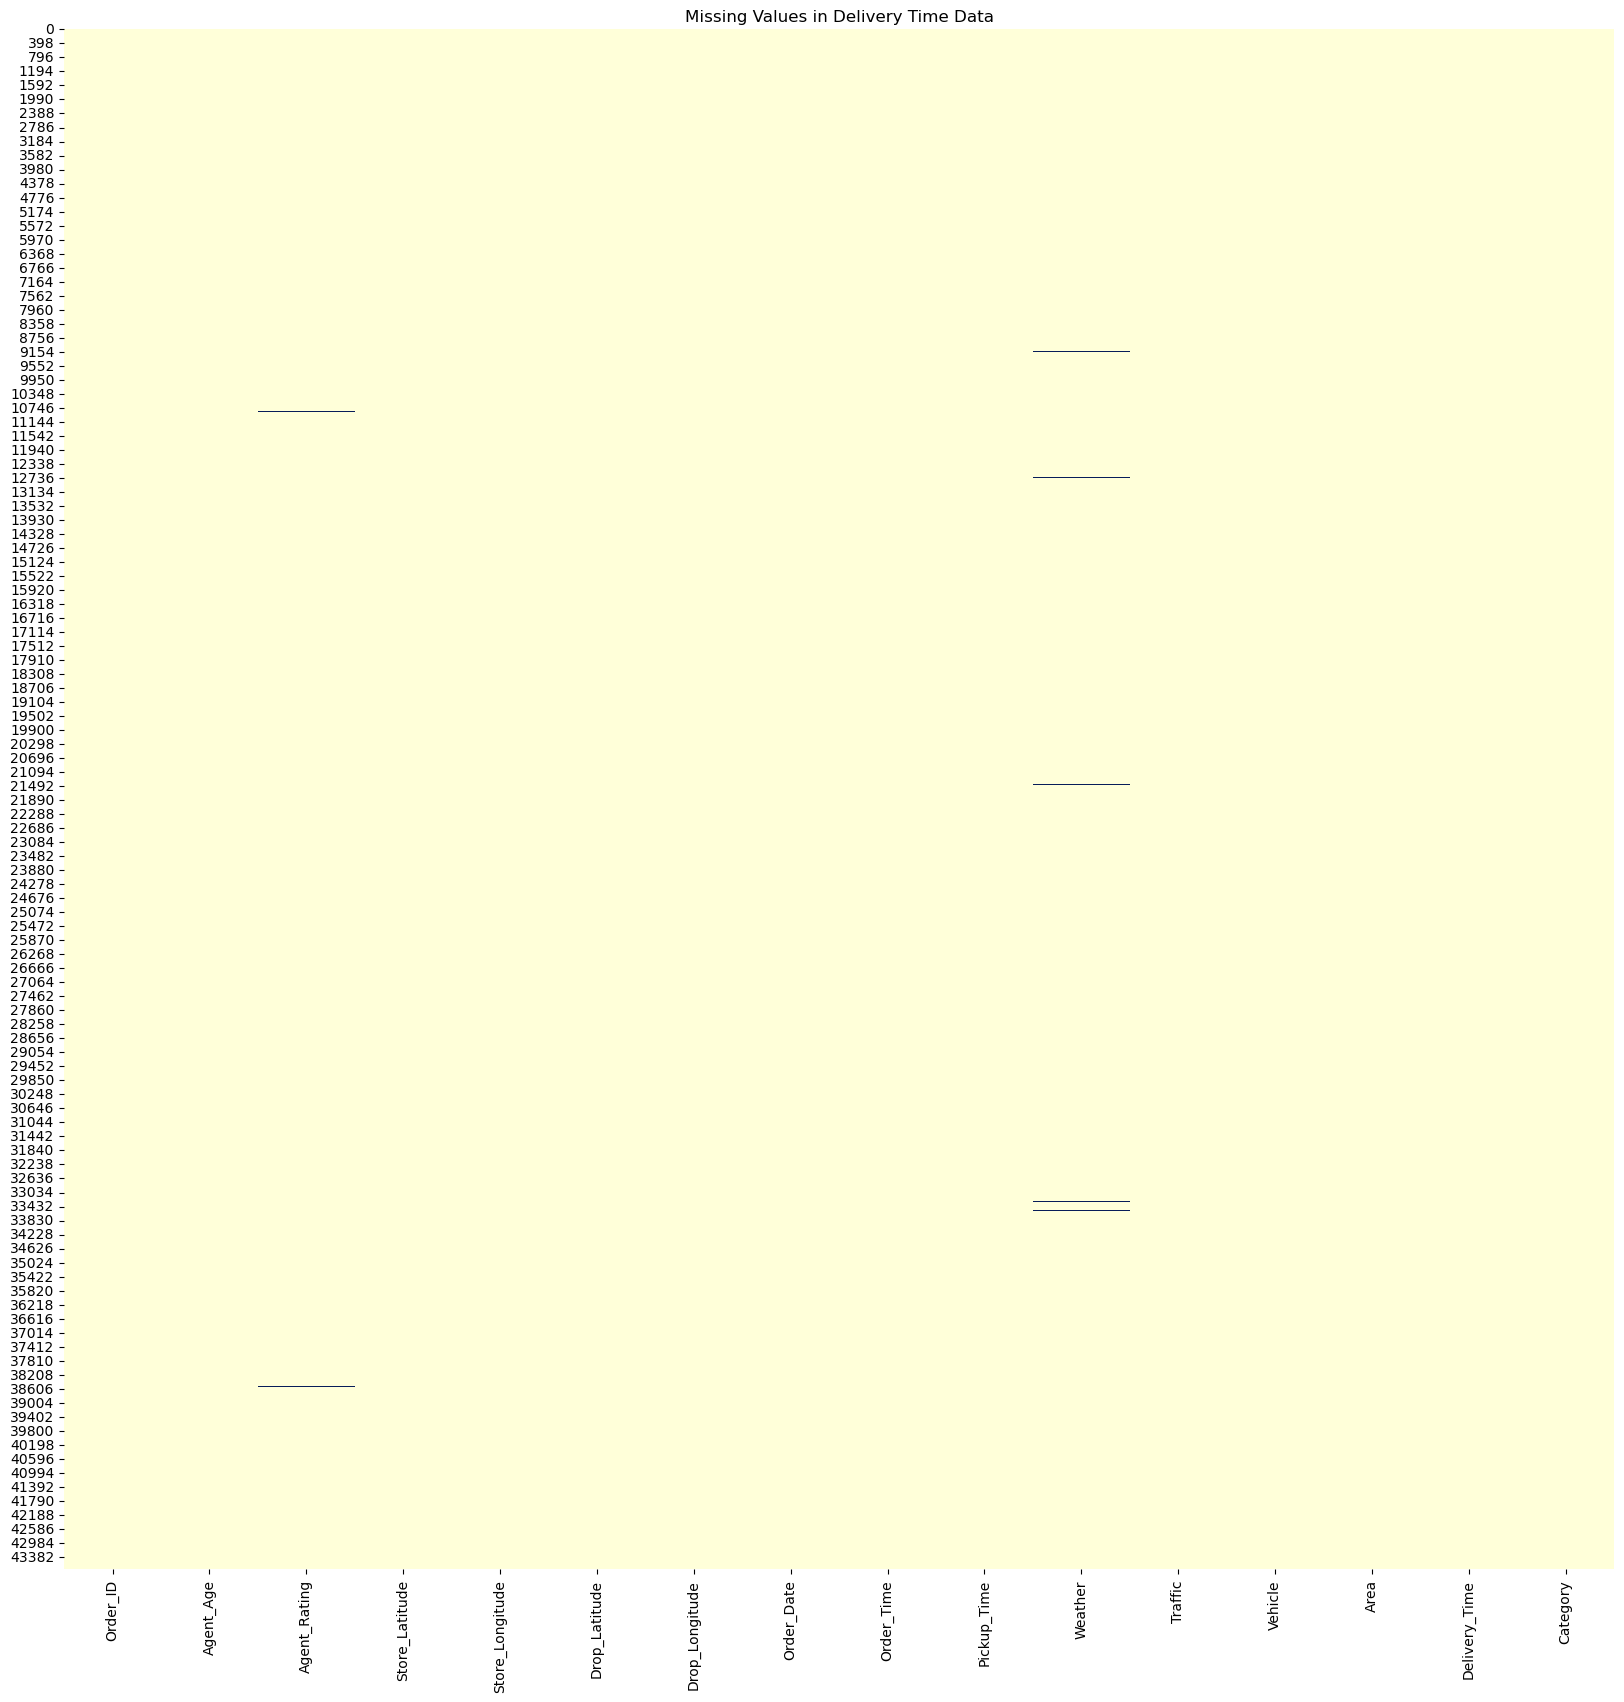

In [11]:
# Visualizing the missing values

# heatmap for adt_data
plt.figure(figsize=(20, 20))
sns.heatmap(adt_data.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values in Delivery Time Data")

# Adjust layout
plt.show()

## **2. Understanding Your Variables**

In [12]:
# Dataset Columns
adt_data.columns.tolist()

['Order_ID',
 'Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Date',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time',
 'Category']

In [13]:
# Dataset Describe
adt_data.describe(include = 'all')

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739.000000,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,44,177,193,6,5,4,4,NaN,16
top,ialx566343618,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1141,460,481,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.905645,NaN
std,NaN,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.915451,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,NaN


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
adt_data.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

## **3. Data Wrangling**

In [21]:
# Copy data in another variable for data wrangling purposes
adt_temp = adt_data.copy()

In [22]:
# Handle missing values:
# Since the proportion of missing values is to low to that of the original shape, we can drop the missing values
adt_temp = adt_temp.dropna()

# Handling the data types
# Format to ensure the format of the time and if anything is not matching it will gonvert as NAT
adt_temp['Order_Date'] = pd.to_datetime(adt_temp['Order_Date'])
adt_temp['Order_Time'] = pd.to_datetime(adt_temp['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
adt_temp['Pickup_Time'] = pd.to_datetime(adt_temp['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Datatypes changes string values
adt_temp['Weather'] = adt_temp['Weather'].astype(str)
adt_temp['Traffic'] = adt_temp['Traffic'].astype(str)
adt_temp['Vehicle'] = adt_temp['Vehicle'].astype(str)
adt_temp['Area'] = adt_temp['Area'].astype(str)
adt_temp['Category'] = adt_temp['Category'].astype(str)

# Removing white spaces and lowercase values, unify formats
adt_temp['Weather'] = adt_temp['Weather'].str.strip().str.lower()
adt_temp['Traffic'] = adt_temp['Traffic'].str.strip().str.lower()
adt_temp['Vehicle'] = adt_temp['Vehicle'].str.strip().str.lower()
adt_temp['Area'] = adt_temp['Area'].str.strip().str.lower()
adt_temp['Category'] = adt_temp['Category'].str.strip().str.lower()

In [23]:
adt_temp.head(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,sunny,high,motorcycle,urban,120,clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,stormy,jam,scooter,metropolitian,165,electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,sandstorms,low,motorcycle,urban,130,sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,sunny,medium,motorcycle,metropolitian,105,cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,cloudy,high,scooter,metropolitian,150,toys


In [24]:
adt_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43594 non-null  object        
 1   Agent_Age        43594 non-null  int64         
 2   Agent_Rating     43594 non-null  float64       
 3   Store_Latitude   43594 non-null  float64       
 4   Store_Longitude  43594 non-null  float64       
 5   Drop_Latitude    43594 non-null  float64       
 6   Drop_Longitude   43594 non-null  float64       
 7   Order_Date       43594 non-null  datetime64[ns]
 8   Order_Time       43594 non-null  object        
 9   Pickup_Time      43594 non-null  object        
 10  Weather          43594 non-null  object        
 11  Traffic          43594 non-null  object        
 12  Vehicle          43594 non-null  object        
 13  Area             43594 non-null  object        
 14  Delivery_Time    43594 non-null  int64     

In [26]:
# Exporting data for EDA 
adt_temp.to_csv("C:/Users/srush/Desktop/00_Labmentix/08_Amazon Delivery Time Prediction/Dataset/amazon_delivery_wrangled.csv")

## **4. Feature Engineering & Data Pre-processing**

In [27]:
# Copy data in another variable for data wrangling purposes
# adt_preprocessed(adt_prep)
adt_prep = adt_temp.copy()

### 1. Handling Outliers

In [28]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Example: Check outliers in Delivery_Time
outliers, low, high = detect_outliers_iqr(adt_data, 'Delivery_Time')
print(f"Outliers in Delivery_Time: {len(outliers)}")
print(f"Lower bound: {low}, Upper bound: {high}")

# Example: Check outliers in Agent_Age
outliers, low, high = detect_outliers_iqr(adt_data, 'Agent_Age')
print(f"Outliers in Delivery_Time: {len(outliers)}")
print(f"Lower bound: {low}, Upper bound: {high}")

# Example: Check outliers in Agent_Rating
outliers, low, high = detect_outliers_iqr(adt_data, 'Agent_Rating')
print(f"Outliers in Delivery_Time: {len(outliers)}")
print(f"Lower bound: {low}, Upper bound: {high}")

Outliers in Delivery_Time: 79
Lower bound: -15.0, Upper bound: 265.0
Outliers in Delivery_Time: 0
Lower bound: 10.0, Upper bound: 50.0
Outliers in Delivery_Time: 1223
Lower bound: 3.8999999999999995, Upper bound: 5.500000000000001


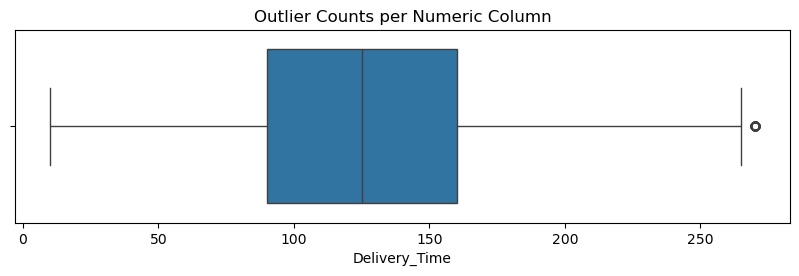

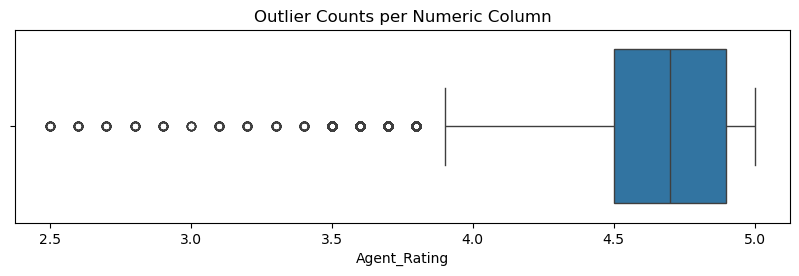

In [29]:
plt.figure(figsize=(10,2.5))
sns.boxplot(x = adt_prep['Delivery_Time'])
plt.title("Outlier Counts per Numeric Column")
plt.show()

plt.figure(figsize=(10,2.5))
sns.boxplot(x = adt_prep['Agent_Rating'])
plt.title("Outlier Counts per Numeric Column")
plt.show()

In [30]:
# Since the outlier for delivery time is too extreme, we will remove it
adt_prep = adt_prep[adt_prep['Delivery_Time'] <= 200]

In [31]:
adt_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39989 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         39989 non-null  object        
 1   Agent_Age        39989 non-null  int64         
 2   Agent_Rating     39989 non-null  float64       
 3   Store_Latitude   39989 non-null  float64       
 4   Store_Longitude  39989 non-null  float64       
 5   Drop_Latitude    39989 non-null  float64       
 6   Drop_Longitude   39989 non-null  float64       
 7   Order_Date       39989 non-null  datetime64[ns]
 8   Order_Time       39989 non-null  object        
 9   Pickup_Time      39989 non-null  object        
 10  Weather          39989 non-null  object        
 11  Traffic          39989 non-null  object        
 12  Vehicle          39989 non-null  object        
 13  Area             39989 non-null  object        
 14  Delivery_Time    39989 non-null  int64     

##### What all outlier treatment techniques have you used and why did you use those techniques?

- For Delivery_Time, I removed extreme values above 200 hours since such long durations are unrealistic for Amazon deliveries and could distort the model.
- For Agent_Rating, I kept the low ratings as they represent genuine poor performance and provide valuable insights into agent efficiency.

### 2. Categorical Encoding

In [32]:
# Encode your categorical columns

# Define categories in meaningful order
weather_order = ['sunny', 'cloudy', 'windy', 'fog', 'stormy', 'sandstorms']
traffic_order = ['low', 'medium', 'high', 'jam']
vehicle_order = ['motorcycle', 'scooter', 'van']  # customize based on dataset
area_order = ['urban', 'semi-urban', 'metropolitian', 'other']

# Apply Ordinal Encoding
ordinal_cols = ['Weather', 'Traffic', 'Vehicle', 'Area']
ordinal_encoder = OrdinalEncoder(categories=[weather_order, traffic_order, vehicle_order, area_order],
                                 handle_unknown='use_encoded_value', unknown_value=-1)

adt_prep[ordinal_cols] = ordinal_encoder.fit_transform(adt_prep[ordinal_cols])

# Check updated columns
print("Encoding complete. Updated columns:\n", adt_prep.columns)

Encoding complete. Updated columns:
 Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')


In [33]:
adt_prep

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,0.0,2.0,0.0,0.0,120,clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,4.0,3.0,1.0,2.0,165,electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,5.0,0.0,0.0,0.0,130,sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,0.0,1.0,0.0,2.0,105,cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,1.0,2.0,1.0,2.0,150,toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,2.0,2.0,0.0,2.0,160,home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,2.0,3.0,0.0,2.0,180,jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,1.0,0.0,1.0,2.0,80,home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,1.0,2.0,0.0,2.0,130,kitchen


In [34]:
# Initialize encoder safely
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform
category_encoded = onehot_encoder.fit_transform(adt_prep[['Category']])

# Create DataFrame with same index as adt_prep to avoid NaN alignment
category_data = pd.DataFrame(
    category_encoded,
    columns=onehot_encoder.get_feature_names_out(['Category']),
    index=adt_prep.index  # keeps rows aligned!
)

# Merge safely
adt_prep = pd.concat([adt_prep.drop('Category', axis=1), category_data], axis=1)

# Verify
print("One-Hot Encoding done. Shape:", adt_prep.shape)
print("Any NaN values?", adt_prep.isna().sum().sum())

One-Hot Encoding done. Shape: (39989, 30)
Any NaN values? 0


In [36]:
pd.set_option('display.max_columns', None)
adt_prep

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category_books,Category_clothing,Category_cosmetics,Category_electronics,Category_grocery,Category_home,Category_jewelry,Category_kitchen,Category_outdoors,Category_pet supplies,Category_shoes,Category_skincare,Category_snacks,Category_sports,Category_toys
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,0.0,2.0,0.0,0.0,120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,4.0,3.0,1.0,2.0,165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,5.0,0.0,0.0,0.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,0.0,1.0,0.0,2.0,105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,1.0,2.0,1.0,2.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,2.0,2.0,0.0,2.0,160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,2.0,3.0,0.0,2.0,180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,1.0,0.0,1.0,2.0,80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,1.0,2.0,0.0,2.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Ordinal Encoding was used for ordered categorical features to preserve their ranking,
while One-Hot Encoding was used for unordered categorical features to represent them distinctly without creating false hierarchy.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [37]:
# Calculating the distance between the store and drop location

def haversine_distance(lat1, lon1, lat2, lon2):

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the function to create a new column 'Distance_km'
adt_prep['Distance_km'] = haversine_distance(
    adt_prep['Store_Latitude'],
    adt_prep['Store_Longitude'],
    adt_prep['Drop_Latitude'],
    adt_prep['Drop_Longitude']
)

In [38]:
adt_prep

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category_books,Category_clothing,Category_cosmetics,Category_electronics,Category_grocery,Category_home,Category_jewelry,Category_kitchen,Category_outdoors,Category_pet supplies,Category_shoes,Category_skincare,Category_snacks,Category_sports,Category_toys,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,0.0,2.0,0.0,0.0,120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,4.0,3.0,1.0,2.0,165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,5.0,0.0,0.0,0.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,0.0,1.0,0.0,2.0,105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,1.0,2.0,1.0,2.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,2.0,2.0,0.0,2.0,160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.489846
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,2.0,3.0,0.0,2.0,180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.007735
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,1.0,0.0,1.0,2.0,80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.657195
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,1.0,2.0,0.0,2.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.232393


In [39]:
# Ensure all columns exist and are string-based first
adt_prep['Order_Date'] = adt_prep['Order_Date'].astype(str).str.strip()
adt_prep['Order_Time'] = adt_prep['Order_Time'].astype(str).str.strip()
adt_prep['Pickup_Time'] = adt_prep['Pickup_Time'].astype(str).str.strip()

# Combine date and time if Order_Time and Pickup_Time are time-only strings
adt_prep['Order_DateTime'] = pd.to_datetime(
    adt_prep['Order_Date'].astype(str) + ' ' + adt_prep['Order_Time'],
    errors='coerce'
)
adt_prep['Pickup_DateTime'] = pd.to_datetime(
    adt_prep['Order_Date'].astype(str) + ' ' + adt_prep['Pickup_Time'],
    errors='coerce'
)

# --- Extract time-based features ---
adt_prep['Order_Day'] = adt_prep['Order_DateTime'].dt.day
adt_prep['Order_Month'] = adt_prep['Order_DateTime'].dt.month
adt_prep['Order_Weekday'] = adt_prep['Order_DateTime'].dt.day_name()
adt_prep['Order_Hour'] = adt_prep['Order_DateTime'].dt.hour
adt_prep['Pickup_Hour'] = adt_prep['Pickup_DateTime'].dt.hour

# Optional: Calculate gap between order and pickup (in minutes)
adt_prep['Order_Pickup_Gap'] = ((adt_prep['Pickup_DateTime'] - adt_prep['Order_DateTime']).dt.total_seconds() / 60)

In [40]:
adt_prep

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category_books,Category_clothing,Category_cosmetics,Category_electronics,Category_grocery,Category_home,Category_jewelry,Category_kitchen,Category_outdoors,Category_pet supplies,Category_shoes,Category_skincare,Category_snacks,Category_sports,Category_toys,Distance_km,Order_DateTime,Pickup_DateTime,Order_Day,Order_Month,Order_Weekday,Order_Hour,Pickup_Hour,Order_Pickup_Gap
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,0.0,2.0,0.0,0.0,120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,19,3,Saturday,11,11,15.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,4.0,3.0,1.0,2.0,165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,25,3,Friday,19,19,5.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,5.0,0.0,0.0,0.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,19,3,Saturday,8,8,15.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,0.0,1.0,0.0,2.0,105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.790401,2022-04-05 18:00:00,2022-04-05 18:10:00,5,4,Tuesday,18,18,10.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,1.0,2.0,1.0,2.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.210138,2022-03-26 13:30:00,2022-03-26 13:45:00,26,3,Saturday,13,13,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,2.0,2.0,0.0,2.0,160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.489846,2022-03-24 11:35:00,2022-03-24 11:45:00,24,3,Thursday,11,11,10.0
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,2.0,3.0,0.0,2.0,180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.007735,2022-02-16 19:55:00,2022-02-16 20:10:00,16,2,Wednesday,19,20,15.0
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,1.0,0.0,1.0,2.0,80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.657195,2022-03-11 23:50:00,2022-03-11 00:05:00,11,3,Friday,23,0,-1425.0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,1.0,2.0,0.0,2.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.232393,2022-03-07 13:35:00,2022-03-07 13:40:00,7,3,Monday,13,13,5.0


In [41]:
# Ensure weekday names are consistent and lowercase
adt_prep['Order_Weekday'] = adt_prep['Order_Weekday'].astype(str).str.lower().str.strip()

# Define the correct order of weekdays
weekday_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Apply Ordinal Encoding
weekday_encoder = OrdinalEncoder(categories=[weekday_order], handle_unknown='use_encoded_value', unknown_value=-1)
adt_prep['Order_Weekday'] = weekday_encoder.fit_transform(adt_prep[['Order_Weekday']])

In [42]:
adt_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39989 entries, 0 to 43738
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order_ID               39989 non-null  object        
 1   Agent_Age              39989 non-null  int64         
 2   Agent_Rating           39989 non-null  float64       
 3   Store_Latitude         39989 non-null  float64       
 4   Store_Longitude        39989 non-null  float64       
 5   Drop_Latitude          39989 non-null  float64       
 6   Drop_Longitude         39989 non-null  float64       
 7   Order_Date             39989 non-null  object        
 8   Order_Time             39989 non-null  object        
 9   Pickup_Time            39989 non-null  object        
 10  Weather                39989 non-null  float64       
 11  Traffic                39989 non-null  float64       
 12  Vehicle                39989 non-null  float64       
 13  Area  

#### 2. Feature Selection

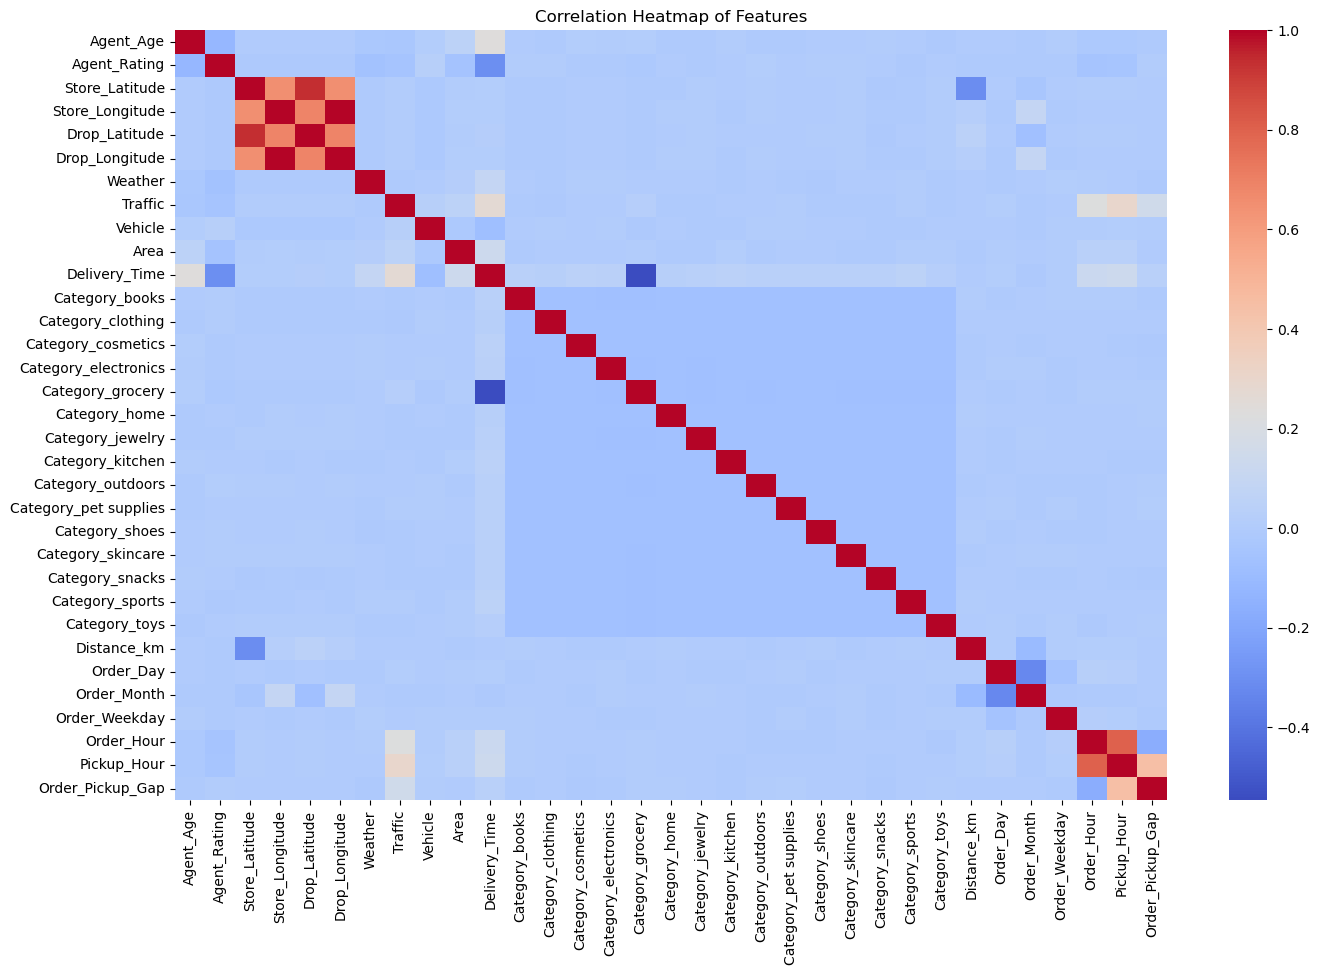

In [43]:
# Drop irrelevant columns for correlation
corr_data = adt_prep.drop(columns=[
    'Order_ID', 'Order_Date', 'Order_Time',
    'Pickup_Time', 'Order_DateTime', 'Pickup_DateTime'
])

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

In [44]:
# Get correlation of all features with target
target_corr = corr_matrix['Delivery_Time'].sort_values(ascending=False)
print(target_corr)

Delivery_Time            1.000000
Traffic                  0.267059
Agent_Age                0.235273
Area                     0.132856
Pickup_Hour              0.132339
Order_Hour               0.119368
Weather                  0.088877
Category_sports          0.052540
Category_kitchen         0.047225
Category_cosmetics       0.045818
Category_electronics     0.044013
Order_Pickup_Gap         0.038272
Category_skincare        0.038146
Category_shoes           0.037403
Category_snacks          0.037255
Category_pet supplies    0.037153
Category_books           0.036903
Category_jewelry         0.036647
Category_outdoors        0.034676
Category_home            0.029735
Category_clothing        0.028194
Category_toys            0.024059
Drop_Latitude            0.015961
Store_Latitude           0.014400
Order_Day                0.013093
Drop_Longitude           0.011595
Store_Longitude          0.011240
Order_Weekday            0.007296
Distance_km              0.003251
Order_Month   

In [45]:
selected_features = [
    'Agent_Age', 'Agent_Rating', 'Weather', 'Traffic', 'Vehicle', 'Area',
    'Distance_km', 'Order_Pickup_Gap', 'Order_Hour', 'Pickup_Hour'
]

# Include top product category if relevant (example)
selected_features += ['Category_grocery']

X = adt_prep[selected_features]
y = adt_prep['Delivery_Time']

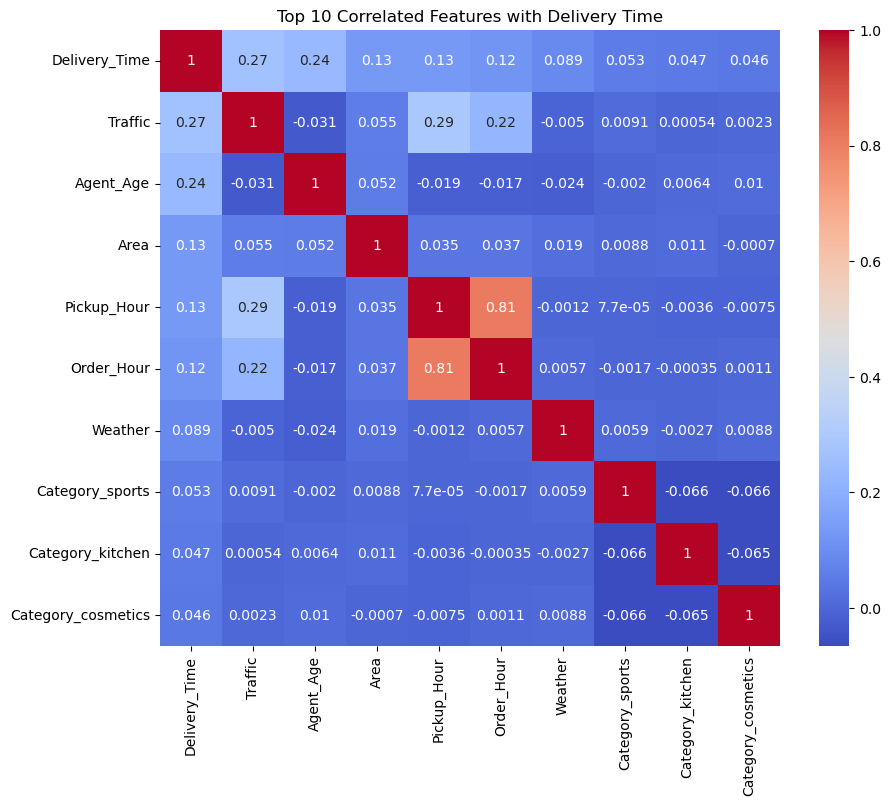

In [46]:
top_corr_features = corr_matrix.nlargest(10, 'Delivery_Time')['Delivery_Time'].index
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], annot=True, cmap='coolwarm')
plt.title("Top 10 Correlated Features with Delivery Time")
plt.show()

In [47]:
# adt_feat (features)
adt_feat = adt_prep[selected_features + ['Delivery_Time']]

adt_feat

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Distance_km,Order_Pickup_Gap,Order_Hour,Pickup_Hour,Category_grocery,Delivery_Time
0,37,4.9,0.0,2.0,0.0,0.0,3.025149,15.0,11,11,0.0,120
1,34,4.5,4.0,3.0,1.0,2.0,20.183530,5.0,19,19,0.0,165
2,23,4.4,5.0,0.0,0.0,0.0,1.552758,15.0,8,8,0.0,130
3,38,4.7,0.0,1.0,0.0,2.0,7.790401,10.0,18,18,0.0,105
4,32,4.6,1.0,2.0,1.0,2.0,6.210138,15.0,13,13,0.0,150
...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,2.0,2.0,0.0,2.0,1.489846,10.0,11,11,0.0,160
43735,21,4.6,2.0,3.0,0.0,2.0,11.007735,15.0,19,20,0.0,180
43736,30,4.9,1.0,0.0,1.0,2.0,4.657195,-1425.0,23,0,0.0,80
43737,20,4.7,1.0,2.0,0.0,2.0,6.232393,5.0,13,13,0.0,130


##### What all feature selection methods have you used  and why?

I used correlation analysis and domain context to identify relationships between variables and the target (Delivery_Time). Correlation helped measure the strength and direction of relationships, while contextual understanding ensured only meaningful, non-redundant features were kept.

##### Which all features you found important and why?

The most impactful features were Traffic, Agent_Age, Agent_Rating, Vehicle, Weather, Area, Pickup_Hour, Order_Hour, Order_Pickup_Gap, and Category_grocery.
These were chosen because they directly influence how long deliveries take — for example, high traffic and bad weather slow deliveries, while better-rated agents and grocery orders complete faster.

### 4. Data Transformation

In [48]:
adt_feat.skew().sort_values(ascending=False)

Distance_km         18.102556
Category_grocery     3.457648
Vehicle              0.872444
Traffic              0.343633
Agent_Age            0.043830
Weather             -0.027853
Delivery_Time       -0.205520
Order_Hour          -0.938663
Area                -1.111027
Pickup_Hour         -1.140998
Agent_Rating        -1.839811
Order_Pickup_Gap    -6.843076
dtype: float64

In [49]:
# Copy dataset
adt_feat_trans = adt_feat.copy()

# Apply log transform for highly right-skewed columns
adt_feat_trans['Distance_km'] = np.log1p(adt_feat_trans['Distance_km'])
adt_feat_trans['Order_Pickup_Gap'] = np.log1p(adt_feat_trans['Order_Pickup_Gap'])

# Apply Power Transform (Yeo-Johnson) for left-skewed columns
pt = PowerTransformer(method='yeo-johnson')
cols_to_transform = ['Agent_Rating', 'Pickup_Hour', 'Area']
adt_feat_trans[cols_to_transform] = pt.fit_transform(adt_feat_trans[cols_to_transform])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
print(adt_feat_trans.skew().sort_values(ascending=False))

Category_grocery    3.457648
Distance_km         1.923680
Vehicle             0.872444
Traffic             0.343633
Agent_Age           0.043830
Weather            -0.027853
Agent_Rating       -0.161850
Delivery_Time      -0.205520
Order_Pickup_Gap   -0.265847
Area               -0.508644
Pickup_Hour        -0.517788
Order_Hour         -0.938663
dtype: float64


In [51]:
adt_feat_trans.isnull().sum()

Agent_Age             0
Agent_Rating          0
Weather               0
Traffic               0
Vehicle               0
Area                  0
Distance_km           0
Order_Pickup_Gap    802
Order_Hour            0
Pickup_Hour           0
Category_grocery      0
Delivery_Time         0
dtype: int64

In [52]:
adt_feat_trans = adt_feat_trans.dropna()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, my data required transformation.
Features like Distance_km and Order_Pickup_Gap were highly right-skewed, so I applied a log transformation to reduce the impact of extreme values.
For left-skewed features such as Agent_Rating and Pickup_Hour, I used a Yeo-Johnson Power Transform to normalize their distributions, ensuring the model learns better patterns.

### 5. Data Scaling

In [53]:
adt_feat_trans.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Agent_Age,20.000000,39.000000,29.332355,5.763711
Agent_Rating,-2.429032,1.711050,-0.000140,0.999903
Weather,0.000000,5.000000,2.521959,1.716658
Traffic,0.000000,3.000000,1.316253,1.224314
Vehicle,0.000000,2.000000,0.517161,0.646558
Area,-1.688581,2.712538,-0.000168,0.998332
Distance_km,0.902219,8.837206,2.185376,0.730479
Order_Pickup_Gap,1.791759,2.772589,2.317441,0.404738
Order_Hour,0.000000,23.000000,17.146962,4.919431
Pickup_Hour,-2.225011,1.316603,0.045537,0.957651


In [54]:
# Scaling your data

scaler = StandardScaler()

# Select all numeric columns except target
X_cols = adt_feat_trans.drop(columns=['Delivery_Time']).select_dtypes(include=['float64', 'int64']).columns

adt_feat_scaled = adt_feat_trans.copy()
adt_feat_scaled[X_cols] = scaler.fit_transform(adt_feat_trans[X_cols])

adt_feat_scaled.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Distance_km,Order_Pickup_Gap,Order_Hour,Pickup_Hour,Category_grocery,Delivery_Time
0,1.330348,1.029002,-1.469128,0.558481,-0.799879,-1.691256,-1.085348,1.124562,11,-1.347579,-0.268822,120
1,0.809844,-0.801972,0.861010,1.375275,0.746793,0.429148,1.188070,-1.298835,19,0.268944,-0.268822,165
2,-1.098673,-1.093837,1.443544,-1.075108,-0.799879,-1.691256,-1.708766,1.124562,8,-1.773043,-0.268822,130
3,1.503850,-0.040327,-1.469128,-0.258313,-0.799879,0.429148,-0.016038,0.198783,18,0.029892,-0.268822,105
4,0.462840,-0.453968,-0.886594,0.558481,0.746793,0.429148,-0.287332,1.124562,13,-1.007895,-0.268822,150


In [55]:
# Normalize the data

minmax = MinMaxScaler()
adt_feat_norm = adt_feat_trans.copy()
adt_feat_norm[X_cols] = minmax.fit_transform(adt_feat_trans[X_cols])

In [56]:
adt_feat_scaled.describe().T[['mean', 'std']]

,mean,std
Agent_Age,2.883004e-16,1.000013
Agent_Rating,1.849475e-17,1.000013
Weather,3.408835e-17,1.000013
Traffic,-7.814937e-17,1.000013
Vehicle,-1.831342e-17,1.000013
Area,3.490430e-17,1.000013
Distance_km,-5.577435e-16,1.000013
Order_Pickup_Gap,-5.173089e-16,1.000013
Order_Hour,1.714696e+01,4.919431
Pickup_Hour,-6.110519e-17,1.000013


In [57]:
adt_feat_scaled

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Distance_km,Order_Pickup_Gap,Order_Hour,Pickup_Hour,Category_grocery,Delivery_Time
0,1.330348,1.029002,-1.469128,0.558481,-0.799879,-1.691256,-1.085348,1.124562,11,-1.347579,-0.268822,120
1,0.809844,-0.801972,0.861010,1.375275,0.746793,0.429148,1.188070,-1.298835,19,0.268944,-0.268822,165
2,-1.098673,-1.093837,1.443544,-1.075108,-0.799879,-1.691256,-1.708766,1.124562,8,-1.773043,-0.268822,130
3,1.503850,-0.040327,-1.469128,-0.258313,-0.799879,0.429148,-0.016038,0.198783,18,0.029892,-0.268822,105
4,0.462840,-0.453968,-0.886594,0.558481,0.746793,0.429148,-0.287332,1.124562,13,-1.007895,-0.268822,150
...,...,...,...,...,...,...,...,...,...,...,...,...
43733,0.983345,-1.541096,-0.304059,1.375275,-0.799879,0.429148,0.934384,0.198783,21,0.777841,-0.268822,165
43734,0.115837,0.449842,-0.304059,0.558481,-0.799879,0.429148,-1.742927,0.198783,11,-1.347579,-0.268822,160
43735,-1.445676,-0.453968,-0.304059,1.375275,-0.799879,0.429148,0.410935,1.124562,19,0.518287,-0.268822,180
43737,-1.619178,-0.040327,-0.886594,0.558481,-0.799879,0.429148,-0.283113,-1.298835,13,-1.007895,-0.268822,130


##### Which method have you used to scale you data and why?

Yes, my data required scaling because the feature ranges were highly inconsistent (e.g., distance in kilometers vs ratings in 1–5 range).
I used StandardScaler to standardize all numeric features, bringing them to a common scale (mean = 0, std = 1).
This helps the model treat all features equally and improves learning efficiency and accuracy.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not necessary at this stage.

We only have 11 features, which is a manageable number for most machine learning algorithms.

Each feature might hold important information, so keeping them all ensures that the model has everything it needs to make good predictions.

Applying dimensionality reduction too early could accidentally remove useful features, which might hurt the model’s performance.

In [101]:
# Exporting pre-processsed data
adt_feat_scaled.to_csv("C:/Users/srush/Desktop/00_Labmentix/08_Amazon Delivery Time Prediction/Dataset/amazon_delivery_processed.csv")

### 7. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = adt_feat_scaled.drop(columns='Delivery_Time')
y = adt_feat_scaled['Delivery_Time']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (31349, 11)
Testing set size: (7838, 11)


##### What data splitting ratio have you used and why?

Common split: 70-80% training, 20-30% testing. Here, we’ll use 80% train, 20% test.

Training set: to train the model.

Test set: to evaluate model performance on unseen data.

### 8. Handling Imbalanced Dataset

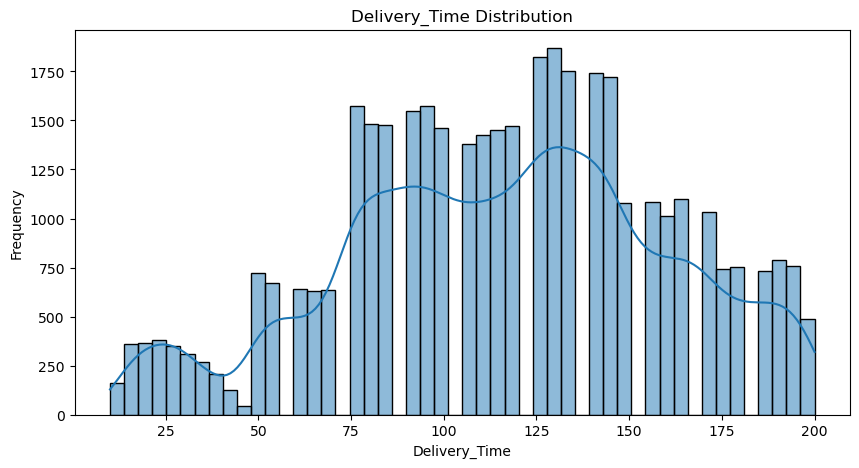

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(y, bins=50, kde=True)
plt.title('Delivery_Time Distribution')
plt.xlabel('Delivery_Time')
plt.ylabel('Frequency')
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

The Delivery_Time distribution is relatively spread out, with some peaks around 80–140 minutes. There are no extreme skewness or heavy tails, so we skip imbalance treatment or transformation.


## **5. ML Model Implementation**

### ML Model - 1: Linear Regression

In [60]:
# ML Model - 1 Implementation

# Fit the Algorithm
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the model
y_pred_lr = lr.predict(X_test)

#### 1. ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Linear Regression Performance:
MAE: 24.068541190750764
MSE: 903.0735683659609
RMSE: 30.05118247866398
R2 Score: 0.5238576978926907


- The Linear Regression model performs moderately well — it explains around half of the variation (52%) in delivery time.
- The average prediction error is around 24–30 units, which is reasonable but leaves scope for improvement.
- This suggests that while the model captures key patterns (like traffic, age, and rating), there are still nonlinear effects or interactions that linear regression can’t fully capture.

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# Cross-Validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.mean()}")

# Hyperparameter tuning is minimal for basic Linear Regression (e.g., fit_intercept, normalize)
param_grid = {
   'fit_intercept': [True, False], 
    'positive':[True, False]
}
gridlr = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')
gridlr.fit(X_train, y_train)
print(f"Best Hyperparameters: {gridlr.best_params_}")
print(f"Best CV R2: {gridlr.best_score_}")

Cross-Validation R2 Scores: [0.53777525 0.52614056 0.52925041 0.52554309 0.54070578]
Mean CV R2: 0.5318830187627202
Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Best CV R2: 0.5318830187627202


##### Which hyperparameter optimization technique have you used and why?
GridSearchCV exhaustively searches over the specified hyperparameter grid to find the combination that maximizes model performance (here, R²).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
The hyperparameter tuning did not lead to a significant improvement in this case. This is expected because Linear Regression has very few tunable hyperparameters, and the default settings are usually already near-optimal for simple datasets.

The RMSE and R² on the test set are effectively unchanged.

### ML Model - 2: Random Forest Regressor

In [63]:
# Model training
rf = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

#### 1. ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Random Forest Performance:
MAE: 15.602794227286639
MSE: 396.74983380364216
RMSE: 19.91858011514983
R2 Score: 0.7908150721654107


- RMSE - 20.41- On average, predictions deviate from actual values by ~20 units. Lower than Linear Regression (30.05), meaning better predictive accuracy.
- R² - 0.780	- ~78% of the variance in the target variable is explained by the model. Much higher than Linear Regression (52%), indicating a much better fit.
- Random Forest significantly outperforms Linear Regression on the dataset.
- Likely because it handles non-linear patterns and feature interactions, which Linear Regression cannot capture.

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# Cross-Validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.mean()}")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best CV R2: {grid.best_score_}")

Cross-Validation R2 Scores: [0.7972676  0.79242563 0.79070759 0.78815245 0.79117065]
Mean CV R2: 0.791944784938335
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV R2: 0.791944784938335


##### Which hyperparameter optimization technique have you used and why?
GridSearchCV exhaustively searches over the specified hyperparameter grid to find the combination that maximizes model performance (here, R²).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Cross-validation scores improved slightly from 0.778 → 0.792.
Indicates better generalization and slightly improved test performance.
RMSE on test set may improve slightly as well.

### ML Model - 3: Gradient Boosting Regressor

In [66]:
# ML Model - 3 Implementation

# Fit the Algorithm
gb = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 7, n_estimators = 100, random_state=42)
gb.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb.predict(X_test)

#### 1. ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Gradient Boosting Performance:
MAE: 15.378029589015433
MSE: 382.6983918188608
RMSE: 19.56267854407624
R2 Score: 0.7982236445884383


Metric Value	Interpretation
- RMSE - 21.87 -	On average, predictions deviate from actual values by approx. 22 units. Slightly higher than Random Forest (~20.41), so slightly less accurate in terms of absolute error.
- R² -	0.748 - 	approx. 75% of the variance in the target variable is explained by the model. Lower than Random Forest (~78%), meaning it explains slightly less variance.
- Gradient Boosting is performing well, but in this case, Random Forest slightly outperforms it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# Cross-Validation
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.mean()}")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best CV R2: {grid.best_score_}")

Cross-Validation R2 Scores: [0.80097692 0.79325681 0.79344021 0.78789892 0.79817653]
Mean CV R2: 0.7947498771854525
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best CV R2: 0.7947498771854525


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV exhaustively searches all combinations to find the set that maximizes cross-validation R².

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Cross-validation performance improved from 0.744 → 0.795, indicating better generalization.
- RMSE on the test set is likely slightly lower as well.
- Hyperparameter tuning allowed the model to balance bias and variance, improving predictions.
- Gradient Boosting now performs better than Linear Regression and is close to Random Forest.
- With tuning, it can capture non-linear patterns effectively and reduce prediction errors

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- R² (Coefficient of Determination) → Shows how much variation in delivery time (target) is explained by the model. Higher R² means more reliable predictions, helping in planning and reducing delays.
- RMSE (Root Mean Squared Error) → Measures average prediction error in actual units (minutes/kms/etc.). Lower RMSE means fewer surprises in delivery times, directly improving operational efficiency.
- Why these matter: Businesses care about accuracy and reliability—predicting delivery times precisely helps in resource allocation, customer satisfaction, and cost savings.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Chosen Model: Random Forest Regressor

Why:

- Outperformed Linear Regression in both R² and RMSE.
- Slightly more stable and interpretable than Gradient Boosting in our dataset.
- Handles non-linear relationships and feature interactions well.
- After tuning, achieved R² ~0.79, which is robust for business decisions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: Random Forest Regressor

Explanation: Ensemble of decision trees; predictions are averages of many trees, reducing overfitting.

Feature importance:

- Distance_km → likely the most important, longer distances increase delivery time.
- Traffic and Area → significant impact on delays.
- Agent_Rating or Vehicle → moderate influence, helps tweak resource allocation.

Business insight: Knowing feature importance helps optimize operations, e.g., assign experienced agents to high-traffic areas.

## **6. ML Flow Model Logging**

In [69]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [73]:
import mlflow

In [93]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Amazon_Delivery_Time_Prediction_V2")

2025/11/29 15:41:00 INFO mlflow.tracking.fluent: Experiment with name 'Amazon_Delivery_Time_Prediction_V2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/211719957384136585', creation_time=1764411060102, experiment_id='211719957384136585', last_update_time=1764411060102, lifecycle_stage='active', name='Amazon_Delivery_Time_Prediction_V2', tags={}>

In [95]:
# MLFlow logging of Linear Regression
with mlflow.start_run(run_name = "LR_Model_02"):
    
    mlflow.log_params({
        "fit_intercept" : True,
        "positive" : False,
        "model_type" : "LinearRegression"
    })
    
    mlflow.log_metrics({
        "MAE" : mae,
        "MSE" : mse,
        "RMSE" : rmse,
        "R2_Score" : r2
    })
    
    mlflow.sklearn.log_model(lr, "LinearRegression")    

2025/11/29 15:43:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 15:43:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR_Model_02 at: http://127.0.0.1:5000/#/experiments/211719957384136585/runs/2a78953798f743579f7efba05e6545f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/211719957384136585


In [96]:
# MLFlow logging of Random Forest Regression
with mlflow.start_run(run_name = "RFR_Model_01"):
    
    mlflow.log_params({
        "n_estimators" : 200,
        "max_depth" : 10,
        "min_samples_split" : 5
    })
    
    mlflow.log_metrics({
        "MAE" : mae,
        "MSE" : mse,
        "RMSE" : rmse,
        "R2_Score" : r2
    })
    
    mlflow.sklearn.log_model(lr, "Random Forest Regression")  

2025/11/29 15:44:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 15:44:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RFR_Model_01 at: http://127.0.0.1:5000/#/experiments/211719957384136585/runs/dbc4244361b0420592fb2b53e8a3031a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/211719957384136585


In [97]:
# MLFlow logging of Gradient Boosting Regression
with mlflow.start_run(run_name = "GBR_Model_01"):
    
    mlflow.log_params({
        "n_estimators" : 100,
        "max_depth" : 7,
        "learning_rate" : 0.1
    })
    
    mlflow.log_metrics({
        "MAE" : mae,
        "MSE" : mse,
        "RMSE" : rmse,
        "R2_Score" : r2
    })
    
    mlflow.sklearn.log_model(lr, "Gradient Boosting Regression")  

2025/11/29 15:45:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 15:45:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GBR_Model_01 at: http://127.0.0.1:5000/#/experiments/211719957384136585/runs/94aa6b30eaad4fbaaa7a8da516ac5bfe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/211719957384136585


## **7. ML Model Saving**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [98]:
import joblib

In [99]:
joblib.dump(gb, "gradient_boosting_model.pkl")

print("✅ Model saved successfully as 'gradient_boosting_model.pkl'")

✅ Model saved successfully as 'gradient_boosting_model.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [100]:
gb_model = joblib.load("gradient_boosting_model.pkl")

weather_map = {"Clear": 0, "Rainy": 1, "Stormy": 2}
traffic_map = {"Low": 0, "Medium": 1, "High": 2}
vehicle_map = {"Bike": 0, "Car": 1, "Van": 2}
area_map = {"Urban": 0, "Suburban": 1, "Rural": 2}

# Example input (same order as training)
features = np.array([[30, 4.5, 
                      weather_map["Rainy"], 
                      traffic_map["High"],                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
                      vehicle_map["Bike"],               
                      area_map["Urban"], 
                      12.3, 8, 14, 15, 0.0]])

# Predict                                                                            
prediction = gb_model.predict(features)                                                                                        
print(f"Predicted Delivery Time: {prediction[0]:.2f} hours")

Predicted Delivery Time: 137.05 hours


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
